<a href="https://colab.research.google.com/github/AgustinCocciardi/IA_Tps/blob/main/Trabajo_Pr%C3%A1ctico_ML_Regresi%C3%B3n_Clasificaci%C3%B3n_Multiclase_Frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico ML - Regresión Logística - Clasificación Multiclase - Frutas
---



Este dataset lo obtuvimos del siguiente sitio: https://www.muratkoklu.com/datasets/

Clasificación de frutos de dátiles en variedades genéticas.
En todo el mundo se cultiva una gran cantidad de frutas, cada una de las cuales tiene varios tipos. Los factores que determinan el tipo de fruto son las características de la apariencia externa como el color, la longitud, el diámetro y la forma. La apariencia externa de los frutos es un determinante importante del tipo de fruto. Determinar la variedad de frutas observando su apariencia externa puede requerir experiencia, lo que lleva mucho tiempo y requiere un gran esfuerzo. El objetivo de este estudio es clasificar los tipos de dátiles, es decir, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi y Sagai, utilizando tres métodos diferentes de aprendizaje automático. Se extrajeron un total de 34 características, incluidas características morfológicas, forma y color.

# Contenido Teórico y Práctico para Desarrollo del Trabajo Práctico

**Importación Librerías**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# LINK SKLEARN LOGISTIC REGRESSION: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Carga Dataset**

In [ ]:
dataset = pd.read_csv('/content/04_Fruit_Datasets.csv')

**Análisis Dataset**

In [ ]:
print('FRUITS DATASET - HEAD: \n', dataset.head(5))

FRUITS DATASET - HEAD: 
      AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB     EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  

In [ ]:
print('FRUITS DATASET - SHAPE: ', dataset.shape)

FRUITS DATASET - SHAPE:  (898, 35)


In [ ]:
print('FRUITS DATASET - INFO: \n', dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [ ]:
print('FRUITS DATASET - STATISTICS: \n', dataset.describe())

FRUITS DATASET - STATISTICS: 
                 AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947   

In [ ]:
print('FRUITS DATASET - CANTIDAD DE INSTANCIAS POR CLASE: \n', dataset.Class.value_counts())

FRUITS DATASET - CANTIDAD DE INSTANCIAS POR CLASE: 
 DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64


**Preprocesamiento de Datos**

In [ ]:
# Numerizamos valores en cadena de texto a valor numérico.
# Acomodamos valores de features para facilitar su operatoria.
classes = {'BERHI': 0, 'IRAQI': 1, 'SOGAY': 2, 'DEGLET': 3, 'ROTANA': 4, 'SAFAVI': 5, 'DOKOL': 6}

# Reemplazamos descripciones de feature por su correspondiente valor numérico.
dataset.Class = [classes[item] for item in dataset.Class]
print('FRUITS DATASET - CLASS FEATURE NUMERIZED: \n', dataset)

FRUITS DATASET - CLASS FEATURE NUMERIZED: 
        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  

In [ ]:
print('FRUITS DATASET - CANTIDAD DE INSTANCIAS POR CLASE: \n', dataset.Class.value_counts())

FRUITS DATASET - CANTIDAD DE INSTANCIAS POR CLASE: 
 6    204
5    199
4    166
3     98
2     94
1     72
0     65
Name: Class, dtype: int64


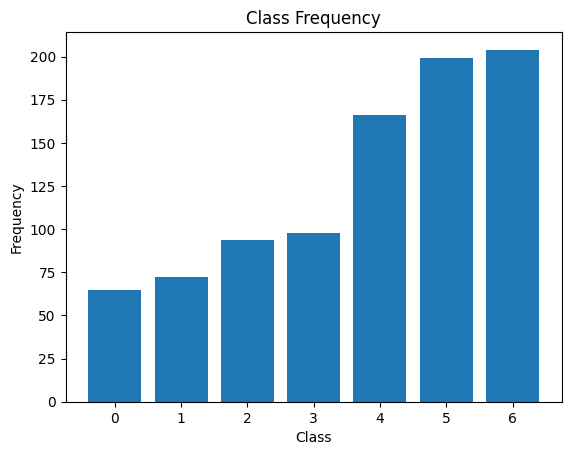

In [ ]:
classes = dataset.Class.values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**Análisis Datos**

Coeficientes Correlación (Ver referencia: [correlation matrix](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/))
Un coeficiente de correlación (normalmente denominado r) es un número único que describe el alcance de la relación lineal entre dos variables. Un valor de +1 indica una linealidad perfecta (las dos variables se mueven juntas, como "altura en pulgadas" y "altura en centímetros"). Un valor de r = 0 indica que no hay correlación (las variables son independientes) y r = -1 indica que las variables están inversamente correlacionadas (un aumento en una variable se asocia con una disminución en la otra).

FRUITS DATASET - CORRELATION MATRIX: 
                AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  EQDIASQ  \
AREA           1.00       0.96        0.88        0.95         -0.37     0.99   
PERIMETER      0.96       1.00        0.96        0.86         -0.17     0.96   
MAJOR_AXIS     0.88       0.96        1.00        0.72          0.06     0.89   
MINOR_AXIS     0.95       0.86        0.72        1.00         -0.61     0.95   
ECCENTRICITY  -0.37      -0.17        0.06       -0.61          1.00    -0.34   
EQDIASQ        0.99       0.96        0.89        0.95         -0.34     1.00   
SOLIDITY       0.03      -0.13       -0.17        0.06         -0.22     0.02   
CONVEX_AREA    1.00       0.96        0.89        0.95         -0.36     0.99   
EXTENT        -0.09      -0.21       -0.28        0.03         -0.34    -0.11   
ASPECT_RATIO  -0.10       0.02        0.11       -0.15          0.11    -0.16   
ROUNDNESS      0.04      -0.24       -0.36        0.24         -0.66  

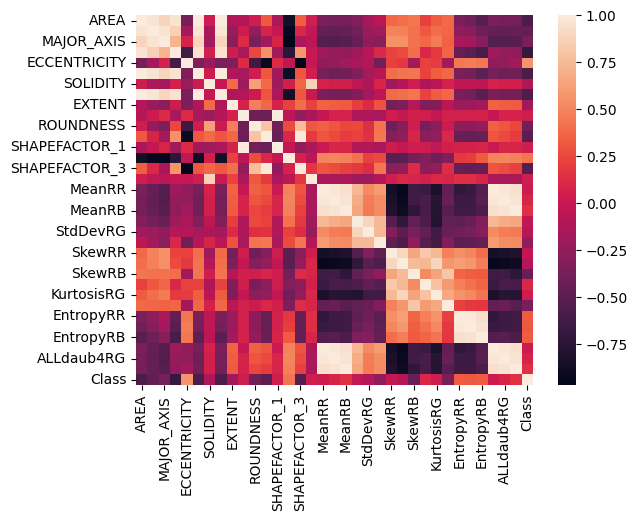

In [ ]:
cormat = dataset.corr()
print('FRUITS DATASET - CORRELATION MATRIX: \n', round(cormat,2))
sns.heatmap(cormat);

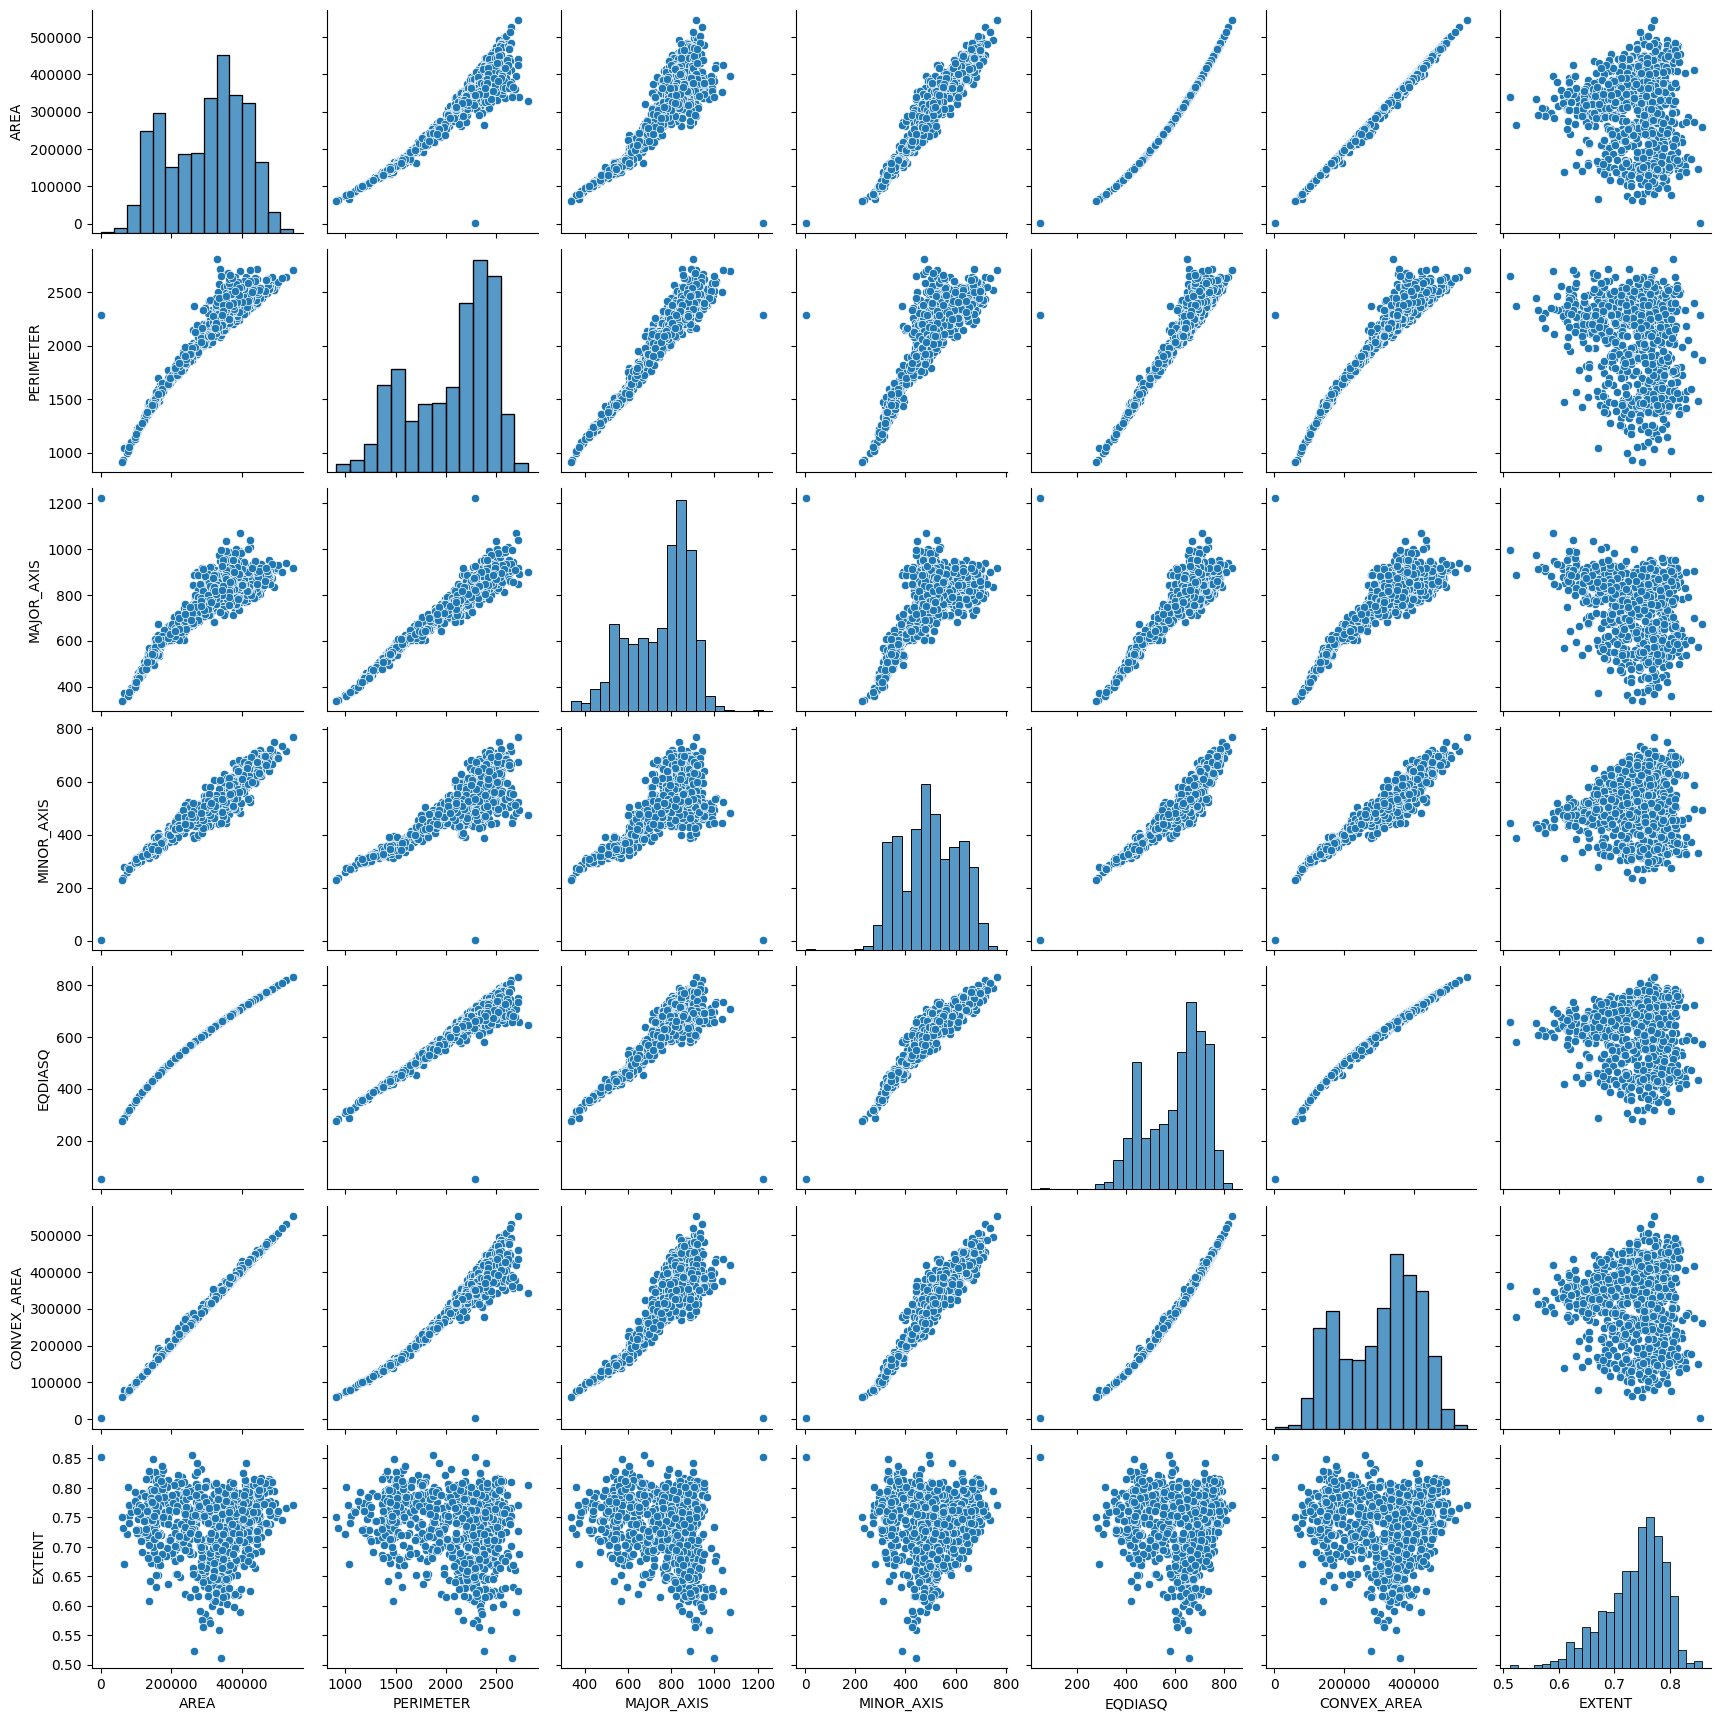

In [ ]:
# Como primer análisis, seleccionamos aquellas features que tienen un valor de correlación cercano a 1.
sns.pairplot(dataset[[
 'AREA',
 'PERIMETER',
 'MAJOR_AXIS',
 'MINOR_AXIS',
 'EQDIASQ',
 'CONVEX_AREA',
 'EXTENT'
 ]]);

Otra técnica utilizada para identificar relación entre features para seleccionar las más relevantes podemos investigar [mutual_info de scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) y [ejemplo](https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a)

In [ ]:
x_features = dataset.drop(labels=['Class'], axis=1)
x_features

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [ ]:
y_features = dataset['Class']
y_features

0      0
1      0
2      0
3      0
4      0
      ..
893    2
894    2
895    2
896    2
897    2
Name: Class, Length: 898, dtype: int64

In [ ]:
x_train_mutual_info, x_test_mutual_info, y_train_mutual_info, y_test_mutual_info = train_test_split(x_features, y_features, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train_mutual_info, y_train_mutual_info)
print('FRUITS DATASET - MUTUAL INFO: \n', mutual_info)

FRUITS DATASET - MUTUAL INFO: 
 [0.91493813 0.82630436 0.76858081 0.98880556 0.52589443 0.9147401
 0.41520989 0.88987877 0.17804183 0.52855877 0.58820482 0.52536683
 0.97605787 0.70512729 0.52926511 0.22770272 0.74874908 0.72521172
 0.58556856 0.3642265  0.30131303 0.32494869 0.59439036 0.66813842
 0.52924043 0.44851227 0.59265971 0.41150848 0.77391944 0.70727723
 0.63027406 0.74801028 0.72284023 0.59042265]


In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train_mutual_info.columns
mutual_info.sort_values(ascending=False)

MINOR_AXIS       0.988806
SHAPEFACTOR_1    0.976058
AREA             0.914938
EQDIASQ          0.914740
CONVEX_AREA      0.889879
PERIMETER        0.826304
EntropyRR        0.773919
MAJOR_AXIS       0.768581
MeanRR           0.748749
ALLdaub4RR       0.748010
MeanRG           0.725212
ALLdaub4RG       0.722840
EntropyRG        0.707277
SHAPEFACTOR_2    0.705127
SkewRG           0.668138
EntropyRB        0.630274
SkewRR           0.594390
KurtosisRG       0.592660
ALLdaub4RB       0.590423
ROUNDNESS        0.588205
MeanRB           0.585569
SHAPEFACTOR_3    0.529265
SkewRB           0.529240
ASPECT_RATIO     0.528559
ECCENTRICITY     0.525894
COMPACTNESS      0.525367
KurtosisRR       0.448512
SOLIDITY         0.415210
KurtosisRB       0.411508
StdDevRR         0.364227
StdDevRB         0.324949
StdDevRG         0.301313
SHAPEFACTOR_4    0.227703
EXTENT           0.178042
dtype: float64

<Axes: >

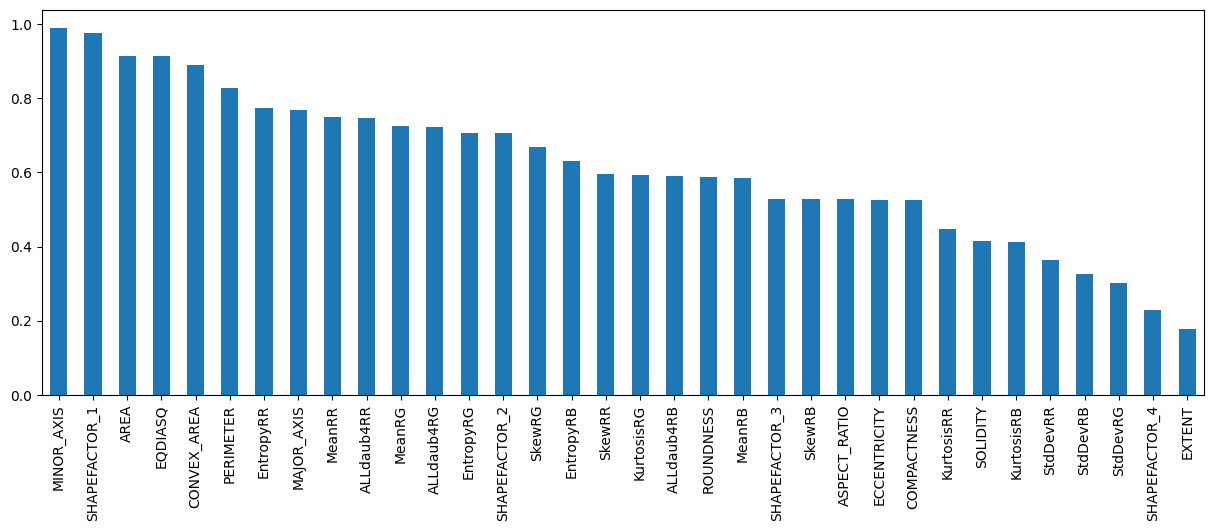

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

**Determinación Features Cols**

In [ ]:
# Determinamos las features que vamos a utilizar para analizar y operar.
feature_cols = [
 'MINOR_AXIS',
'MAJOR_AXIS',
'AREA',
'PERIMETER',
'SHAPEFACTOR_2',
'MeanRR',
'MeanRG',
'MeanRB',
'SkewRR',
'SkewRG']

FRUITS DATASET - CORRELATION MATRIX: 
                MINOR_AXIS  MAJOR_AXIS  AREA  PERIMETER  SHAPEFACTOR_2  MeanRR  \
MINOR_AXIS           1.00        0.72  0.95       0.86          -0.74   -0.20   
MAJOR_AXIS           0.72        1.00  0.88       0.96          -0.96   -0.53   
AREA                 0.95        0.88  1.00       0.96          -0.86   -0.35   
PERIMETER            0.86        0.96  0.96       1.00          -0.93   -0.45   
SHAPEFACTOR_2       -0.74       -0.96 -0.86      -0.93           1.00    0.49   
MeanRR              -0.20       -0.53 -0.35      -0.45           0.49    1.00   
MeanRG              -0.23       -0.54 -0.38      -0.47           0.51    0.97   
MeanRB              -0.25       -0.51 -0.38      -0.45           0.48    0.94   
SkewRR               0.23        0.55  0.38       0.49          -0.50   -0.87   
SkewRG               0.26        0.55  0.40       0.48          -0.50   -0.93   

               MeanRG  MeanRB  SkewRR  SkewRG  
MINOR_AXIS      -0.23

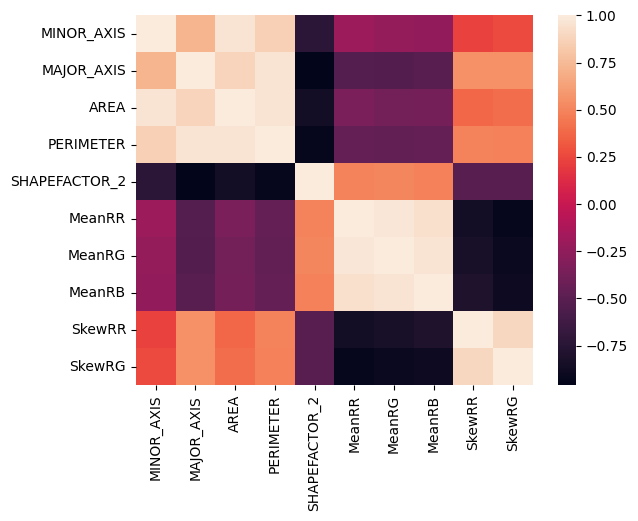

In [ ]:
cormat = dataset[feature_cols].corr()
print('FRUITS DATASET - CORRELATION MATRIX: \n', round(cormat,2))
sns.heatmap(cormat);

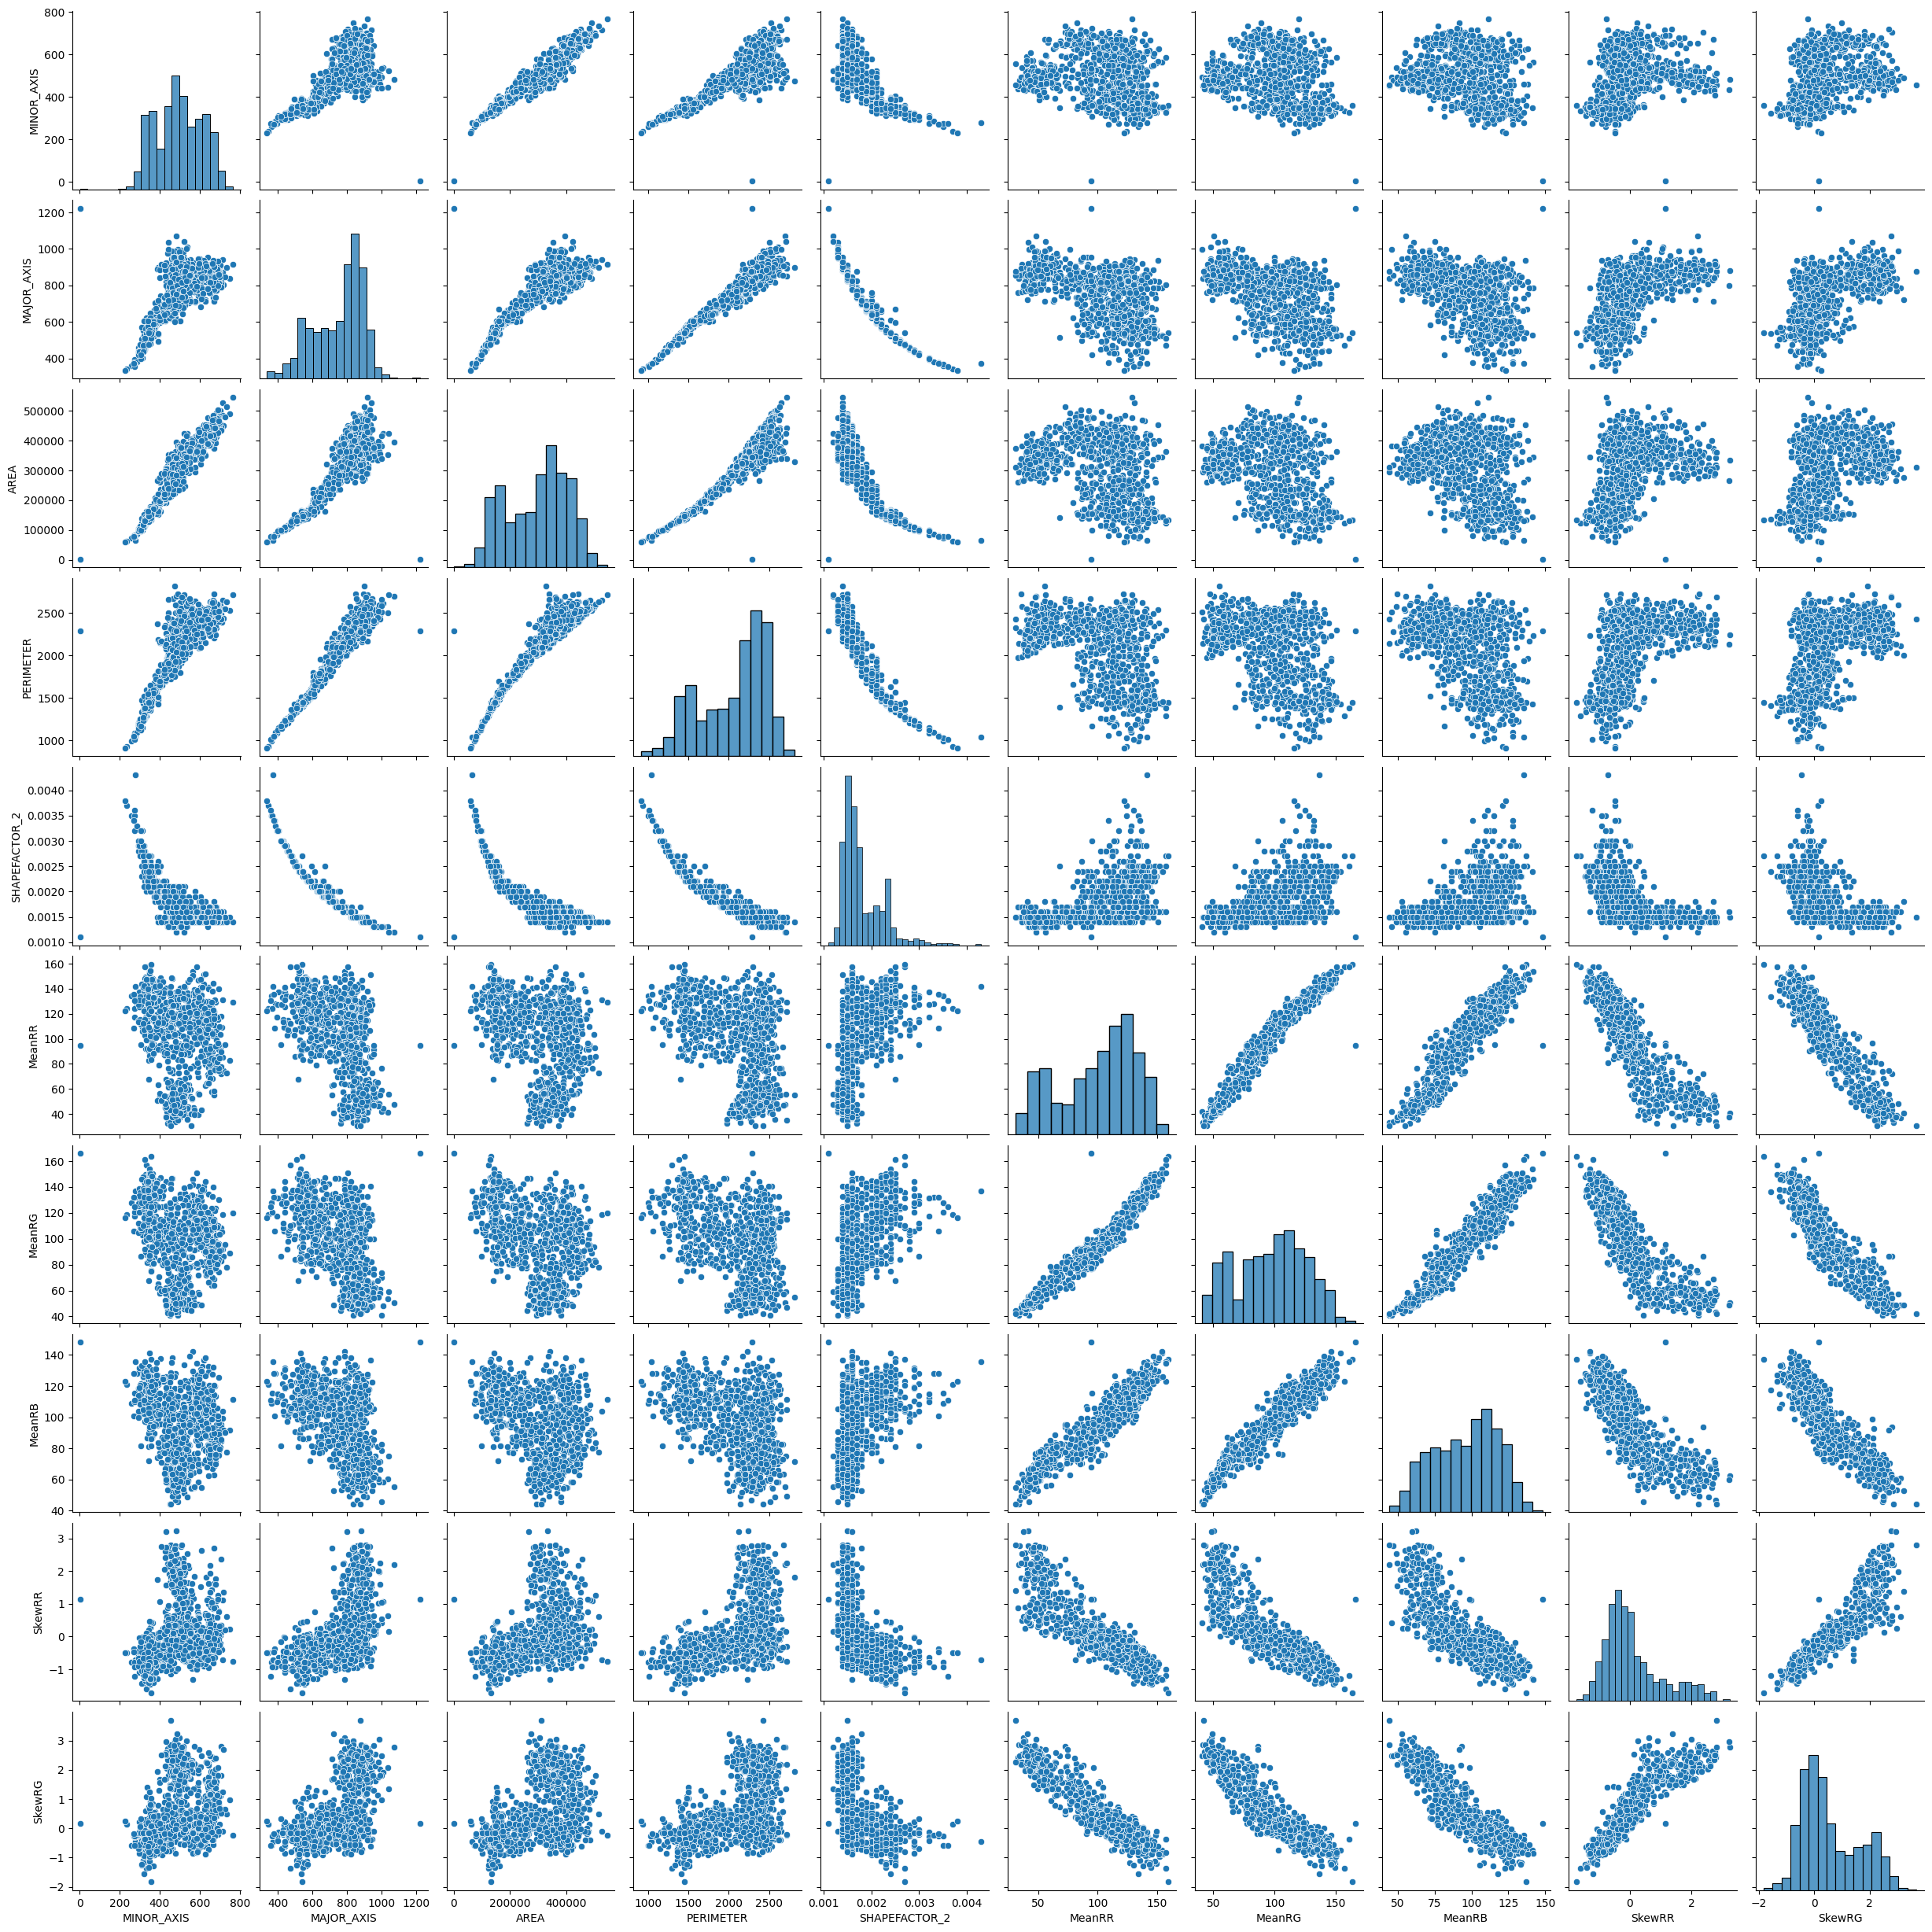

In [ ]:
# Como primer análisis para mutual_info, seleccionamos aquellas features con un valor mayor 0.75
sns.pairplot(dataset[feature_cols]);

In [ ]:
x = dataset[feature_cols]
print('FRUITS DATASET - X: \n', x)
y = dataset.Class
print('FRUITS DATASET - Y: \n', y)

FRUITS DATASET - X: 
      MINOR_AXIS  MAJOR_AXIS    AREA  PERIMETER  SHAPEFACTOR_2    MeanRR  \
0      645.6693    837.8484  422163  2378.9080         0.0015  117.4466   
1      595.2073    723.8198  338136  2085.1440         0.0018  100.0578   
2      715.3638    940.7379  526843  2647.3940         0.0014  130.9558   
3      645.2988    827.9804  416063  2351.2100         0.0016   86.7798   
4      582.8359    763.9877  347562  2160.3540         0.0017  105.5484   
..          ...         ...     ...        ...            ...       ...   
893    477.1796    691.8453  255403  1925.3650         0.0019   98.1696   
894    551.5447    855.4633  365924  2664.8230         0.0015   93.6238   
895    435.6219    747.4943  254330  1926.7360         0.0017   88.2526   
896    441.8297    716.6485  238955  1906.2679         0.0018  102.4622   
897    534.7757    823.8438  343792  2289.2720         0.0016   94.6863   

       MeanRG    MeanRB  SkewRR  SkewRG  
0    109.9085   95.6774 -0.5661 -0.

**Balanceo de Set de Datos**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(x, y)

print(f"Training target statistics: {Counter(y)}")
print(f"Testing target statistics: {Counter(y_res)}")

Training target statistics: Counter({6: 204, 5: 199, 4: 166, 3: 98, 2: 94, 1: 72, 0: 65})
Testing target statistics: Counter({0: 204, 3: 204, 6: 204, 1: 204, 4: 204, 5: 204, 2: 204})


**Separación Set de Datos**

In [ ]:
set_test_size = 0.25

In [ ]:
# Obtenemoslos set de datos de entrenamiento y pruebas.
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=set_test_size, random_state=0, shuffle=True)

In [ ]:
x_train = x_train.values

In [ ]:
x_train

array([[ 4.464828e+02,  6.222163e+02,  2.091930e+05, ...,  9.839460e+01,
        -1.960000e-01,  8.690000e-02],
       [ 3.779843e+02,  5.701261e+02,  1.690300e+05, ...,  1.145476e+02,
        -2.126000e-01,  2.409000e-01],
       [ 3.581697e+02,  5.376102e+02,  1.508700e+05, ...,  1.200798e+02,
        -1.636000e-01,  7.920000e-02],
       ...,
       [ 5.273477e+02,  8.406997e+02,  3.463530e+05, ...,  8.017750e+01,
         3.877000e-01,  5.479000e-01],
       [ 6.483220e+02,  8.364046e+02,  4.200570e+05, ...,  1.162795e+02,
         1.329000e-01,  2.168000e-01],
       [ 5.062896e+02,  9.641249e+02,  3.767760e+05, ...,  7.186100e+01,
         2.386000e-01,  1.622300e+00]])

In [ ]:
y_train = y_train.values

In [ ]:
y_train

array([2, 6, 6, ..., 2, 4, 5])

In [ ]:
x_test = x_test.values

In [ ]:
x_test

array([[ 5.471810e+02,  7.447740e+02,  3.180760e+05, ...,  1.174680e+02,
        -8.095000e-01, -4.887000e-01],
       [ 4.876316e+02,  7.180688e+02,  2.405370e+05, ...,  1.079522e+02,
         1.330000e-01,  3.650000e-01],
       [ 6.078824e+02,  8.816053e+02,  4.189310e+05, ...,  1.136015e+02,
        -2.998000e-01, -2.971000e-01],
       ...,
       [ 5.788624e+02,  7.079080e+02,  2.943280e+05, ...,  1.172044e+02,
        -4.658000e-01, -1.545000e-01],
       [ 4.606281e+02,  6.370115e+02,  2.289160e+05, ...,  8.414970e+01,
         3.120000e-02,  5.294000e-01],
       [ 3.269862e+02,  5.573111e+02,  1.427440e+05, ...,  1.168849e+02,
        -5.898000e-01, -2.427000e-01]])

In [ ]:
y_test = y_test.values

In [ ]:
y_test

array([4, 2, 4, 0, 4, 4, 1, 6, 6, 1, 1, 0, 6, 0, 6, 4, 0, 4, 6, 5, 3, 4,
       3, 0, 6, 6, 2, 6, 4, 3, 1, 4, 5, 4, 1, 5, 6, 5, 5, 3, 3, 2, 5, 2,
       3, 1, 0, 5, 6, 6, 3, 6, 3, 1, 2, 0, 0, 0, 4, 1, 1, 4, 1, 2, 6, 2,
       0, 5, 0, 0, 1, 2, 5, 2, 3, 5, 0, 3, 5, 0, 6, 4, 5, 1, 0, 2, 1, 6,
       0, 3, 6, 6, 0, 0, 3, 3, 2, 0, 0, 0, 2, 2, 0, 4, 3, 0, 5, 4, 3, 6,
       3, 6, 0, 1, 0, 2, 4, 0, 5, 1, 4, 0, 6, 0, 5, 4, 3, 1, 1, 4, 4, 6,
       2, 4, 4, 2, 1, 0, 1, 6, 2, 5, 4, 5, 4, 2, 1, 1, 4, 6, 3, 6, 0, 5,
       1, 6, 3, 3, 5, 0, 0, 4, 3, 0, 3, 1, 0, 0, 5, 0, 2, 1, 1, 5, 2, 3,
       5, 4, 2, 1, 0, 6, 1, 2, 0, 0, 0, 1, 1, 1, 3, 5, 0, 2, 4, 2, 2, 4,
       5, 0, 4, 2, 0, 1, 0, 0, 6, 2, 1, 5, 4, 0, 0, 5, 3, 6, 1, 0, 5, 4,
       2, 6, 2, 3, 6, 5, 6, 4, 5, 0, 4, 1, 1, 2, 2, 0, 1, 6, 0, 3, 2, 4,
       5, 2, 3, 4, 4, 6, 1, 1, 0, 4, 0, 6, 0, 2, 3, 5, 4, 5, 0, 0, 3, 5,
       2, 5, 6, 4, 4, 2, 6, 3, 0, 4, 3, 1, 4, 6, 1, 4, 0, 0, 0, 5, 6, 4,
       0, 3, 6, 1, 4, 5, 4, 3, 5, 6, 1, 2, 0, 1, 4,

**Normalizacion Modelo**

In [ ]:
data = pd.DataFrame(x_train, columns=feature_cols)

In [ ]:
z_scores = (data - data.mean()) / data.std()
z_scores

,MINOR_AXIS,MAJOR_AXIS,AREA,PERIMETER,SHAPEFACTOR_2,MeanRR,MeanRG,MeanRB,SkewRR,SkewRG
0,-0.642959,-1.112997,-1.024002,-0.923269,0.972427,0.734497,0.523105,0.172272,-0.348128,-0.548945
1,-1.243200,-1.526632,-1.410010,-1.496742,1.247875,0.543152,0.493454,0.987979,-0.367777,-0.388969
2,-1.416832,-1.784833,-1.584546,-1.782630,1.798771,0.794570,1.132113,1.267349,-0.309778,-0.556943
3,1.409598,0.766297,1.329931,1.093220,-0.680262,-0.683720,-0.782331,-1.053097,1.972039,1.857126
4,-0.313396,1.305081,0.262809,0.502928,-0.955710,0.943729,0.550804,0.588579,0.295653,-0.324564
...,...,...,...,...,...,...,...,...,...,...
1066,-0.502158,0.401003,-0.249536,0.122464,-0.404814,-2.183950,-2.021828,-2.299362,1.706904,1.961214
1067,0.582182,0.245062,0.457798,0.402061,-0.404814,-0.130864,-0.624276,-0.326621,0.285828,0.075790
1068,0.065647,0.621926,0.294247,0.607302,-0.680262,-0.168530,-0.632446,-0.747670,0.342761,-0.070057
1069,1.125725,0.587820,1.002618,0.931952,-0.680262,0.765384,0.729998,1.075438,0.041170,-0.414004


In [ ]:
nuevo_x_train = z_scores.values
nuevo_x_train

array([[-0.64295902, -1.11299685, -1.02400195, ...,  0.17227192,
        -0.34812817, -0.5489447 ],
       [-1.24320018, -1.52663238, -1.41000971, ...,  0.98797925,
        -0.36777657, -0.38896936],
       [-1.41683228, -1.78483319, -1.584546  , ...,  1.26734878,
        -0.3097783 , -0.55694347],
       ...,
       [ 0.06564688,  0.62192639,  0.29424681, ..., -0.74767001,
         0.34276135, -0.07005747],
       [ 1.12572489,  0.58782005,  1.0026181 , ...,  1.07543814,
         0.04117038, -0.41400446],
       [-0.11888181,  1.6020157 ,  0.58664315, ..., -1.16764339,
         0.16628092,  1.04603026]])

In [ ]:
data = pd.DataFrame(x_test, columns=feature_cols)

In [ ]:
z_scores = (data - data.mean()) / data.std()
z_scores

,MINOR_AXIS,MAJOR_AXIS,AREA,PERIMETER,SHAPEFACTOR_2,MeanRR,MeanRG,MeanRB,SkewRR,SkewRG
0,0.125385,-0.174146,-0.070277,-0.015814,-0.110787,0.896498,0.815801,1.199131,-1.028296,-1.124801
1,-0.393140,-0.382472,-0.799260,-0.431205,0.664723,1.087880,0.934446,0.697708,0.101726,-0.200790
2,0.653941,0.893267,0.877911,0.769693,-0.627794,0.897067,0.782245,0.995391,-0.417185,-0.917421
3,-0.189693,-0.248275,-0.294061,-0.330011,-0.110787,-0.428109,-0.439670,-0.859331,-0.049703,0.045555
4,1.214457,0.644235,1.100322,1.578305,-0.627794,0.755532,0.732264,0.538804,-0.429295,-0.834187
...,...,...,...,...,...,...,...,...,...,...
352,-0.304516,-0.208520,-0.346174,-0.349625,-0.110787,-0.290360,-0.150048,-0.175471,-0.272111,0.088417
353,-1.878360,-1.661847,-1.784161,-1.849550,1.440233,1.559019,2.064961,2.062387,-1.455607,-1.859183
354,0.401250,-0.461736,-0.293544,-0.040653,0.664723,1.179772,1.363194,1.185241,-0.616213,-0.763076
355,-0.628272,-1.014796,-0.908515,-0.967471,0.664723,-0.255690,-0.500890,-0.556536,-0.020329,-0.022850


In [ ]:
nuevo_x_test = z_scores.values
nuevo_x_test

array([[ 0.12538528, -0.17414629, -0.07027721, ...,  1.1991313 ,
        -1.02829643, -1.12480104],
       [-0.39313963, -0.38247211, -0.79926004, ...,  0.69770769,
         0.10172576, -0.20078998],
       [ 0.6539412 ,  0.89326728,  0.87791098, ...,  0.99539075,
        -0.41718523, -0.91742079],
       ...,
       [ 0.40125027, -0.46173597, -0.29354401, ...,  1.18524122,
        -0.61621301, -0.7630762 ],
       [-0.62827193, -1.01479573, -0.90851487, ..., -0.55653634,
        -0.02032863, -0.02284993],
       [-1.79195542, -1.63653424, -1.71866085, ...,  1.16840555,
        -0.76488436, -0.85854038]])

**Definición Modelo**

In [ ]:
regressor = LogisticRegression(max_iter=8000)

**Entrenamiento Modelo**

In [ ]:
regressor.fit(nuevo_x_train, y_train)

LogisticRegression(max_iter=8000)

**Predicción Resultados**

In [ ]:
y_pred = regressor.predict(nuevo_x_test)

In [ ]:
print('FRUITS DATASET - Y PREDICTIONS: \n', y_pred)

FRUITS DATASET - Y PREDICTIONS: 
 [3 2 4 2 4 4 1 6 6 1 1 0 6 0 6 4 0 4 6 5 3 4 3 0 6 6 2 6 4 3 1 4 5 4 0 5 6
 5 3 3 6 2 5 2 3 0 1 5 6 3 3 6 3 1 2 0 0 0 4 1 1 4 1 2 6 2 1 5 0 1 1 2 5 2
 2 2 0 3 5 0 3 4 5 1 0 2 1 3 0 3 6 6 0 0 3 6 3 1 0 1 2 2 0 4 3 0 5 4 3 6 3
 6 4 0 0 2 4 0 5 1 4 0 6 2 5 4 3 0 1 4 4 6 2 4 4 2 0 0 1 6 2 5 4 5 4 2 1 1
 4 6 6 6 0 5 0 3 2 2 5 0 0 0 3 0 3 0 0 2 5 0 2 1 0 5 3 3 5 4 2 1 0 6 1 2 0
 0 0 1 1 1 3 5 0 2 4 2 2 4 5 0 4 2 0 1 0 0 3 2 1 5 4 0 0 5 6 6 1 0 5 2 2 6
 2 2 6 5 6 4 5 0 4 1 1 2 2 0 0 6 0 3 2 4 5 3 6 4 4 6 1 0 0 4 0 6 4 3 6 5 4
 5 0 0 3 5 2 5 6 2 4 2 6 3 4 4 2 1 4 6 0 4 0 0 4 5 6 4 0 3 6 1 4 5 4 2 5 6
 1 2 0 1 4 4 5 3 3 1 2 4 3 4 5 6 5 2 6 4 4 2 6 1 4 0 5 2 5 5 4 1 4 4 1 1 2
 6 6 6 2 1 3 0 5 6 5 5 4 1 2 0 5 1 1 0 3 6 4 3 6]


**Evaluación Modelo**

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('FRUITS DATASET - CONFUSION MATRIX: \n', cnf_matrix)

FRUITS DATASET - CONFUSION MATRIX: 
 [[54  7  3  1  4  0  0]
 [11 39  0  0  0  0  0]
 [ 0  0 39  5  0  0  0]
 [ 0  0  7 26  0  0  8]
 [ 1  0  2  1 55  0  0]
 [ 0  0  1  1  0 45  0]
 [ 0  0  0  5  0  0 42]]


Text(0.5, 427.9555555555555, 'Predicted Label')

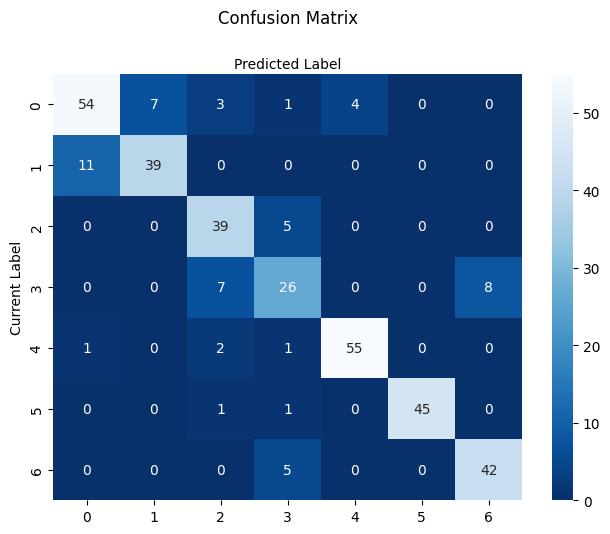

In [ ]:
# Visualizamos matriz de confusión.
class_names = [0, 1, 2, 3, 4, 5, 6]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Current Label')
plt.xlabel('Predicted Label')

In [ ]:
# Ejecutamos Reporte de Clasificación.
from sklearn.metrics import classification_report

print('FRUITS DATASET - CLASSIFICATION REPORT: \n', classification_report(y_test, y_pred))

FRUITS DATASET - CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        69
           1       0.85      0.78      0.81        50
           2       0.75      0.89      0.81        44
           3       0.67      0.63      0.65        41
           4       0.93      0.93      0.93        59
           5       1.00      0.96      0.98        47
           6       0.84      0.89      0.87        47

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357



In [ ]:
# Evaluamos Score.
print('FRUITS DATASET - ACCURACY SCORE BY METRICS: ', metrics.accuracy_score(y_test, y_pred))

FRUITS DATASET - ACCURACY SCORE BY METRICS:  0.8403361344537815


In [ ]:
print('FRUITS DATASET - SCORE BY REGRESSOR SCORE: ', regressor.score(nuevo_x_test, y_test))

FRUITS DATASET - SCORE BY REGRESSOR SCORE:  0.8403361344537815
